In [3]:
from pipeline.load import MyDataset, get_dataloader
from matplotlib import pyplot as plt
import numpy as np
import requests
import pandas as pd
import json
import os
import pdb

In [10]:
dataset = MyDataset(in_dir="training_data/train")

training_data/train
training_data/train/images/*.jpg


In [11]:
dataset.images[:5]

['training_data/train/images/d41d81_14336_19456_i.jpg',
 'training_data/train/images/d41d81_1024_21504_i.jpg',
 'training_data/train/images/d41d81_20480_20480_i.jpg',
 'training_data/train/images/d41d81_31744_15360_i.jpg',
 'training_data/train/images/d41d81_24576_10240_i.jpg']

In [12]:
def display_random(image_tuple=None):
    if image_tuple==None:
        image_tuple=dataset[np.random.randint(0, len(dataset))]
    fig, ax = plt.subplots(ncols=len(image_tuple)-1)
    ax[0].imshow(image_tuple[0])
    ax[1].imshow(image_tuple[1])

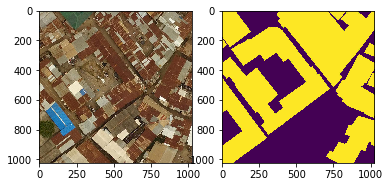

In [16]:
display_random()

ls: cannot access 'training_data/train/images': No such file or directory
0
ls: cannot access 'training_data/train/masks': No such file or directory
0


# Study Train / Test File sizes

In [20]:
scene_log = requests.get('https://raw.githubusercontent.com/thomkav/building_segmentation_cv/master/scene_log.json').json()
scene_log = pd.DataFrame.from_dict(scene_log,orient='index')
scene_log['num_blocks'] = scene_log['blocks']
scene_log.size = pd.to_numeric(scene_log.size)
scene_log.num_blocks = pd.to_numeric(scene_log.num_blocks)
scene_log.tier = pd.to_numeric(scene_log.tier)

JSONDecodeError: Extra data: line 1 column 4 - line 2 column 1 (char 3 - 15)

In [19]:
scene_log[scene_log.tier == 2].scene_id.unique()

NameError: name 'scene_log' is not defined

In [ ]:
cities = set(sm.index.values)
train_regions = {'dar','kam','mon','nia','ptn','znz'}
test_regions = cities - train_regions


train_size = sm[sm.index.isin(train_regions)].size.sum()
train_num_blocks = sm[sm.index.isin(train_regions)].num_blocks.sum()

print(f'{len(train_regions)} of {len(cities)} cities used for train region')
print(f'Training regs are {round(train_size / sm.size.sum(),2)*100}% of total area')
print(f'Training regs are {round(train_num_blocks / sm.num_blocks.sum(), 2)*100}% of unique blocks')
train_sc_ids = sm[sm.index.isin(train_regions)].scene_id.unique()
test_sc_ids = sm[~sm.index.isin(train_regions)].scene_id.unique()
print('Train scene ID list:', train_sc_ids)
print('Test scene ID list:', test_sc_ids)

# Tile Counts per Scene for validation split

In [34]:
!ls 

06f252_0_0_i.jpg	  42f235_45056_48128_i.jpg   a42435_3072_3072_i.jpg
06f252_0_10240_i.jpg	  42f235_45056_49152_i.jpg   a42435_3072_31744_i.jpg
06f252_0_1024_i.jpg	  42f235_45056_5120_i.jpg    a42435_3072_32768_i.jpg
06f252_0_11264_i.jpg	  42f235_45056_6144_i.jpg    a42435_3072_33792_i.jpg
06f252_0_12288_i.jpg	  42f235_45056_7168_i.jpg    a42435_3072_34816_i.jpg
06f252_0_13312_i.jpg	  42f235_45056_8192_i.jpg    a42435_3072_35840_i.jpg
06f252_0_14336_i.jpg	  42f235_45056_9216_i.jpg    a42435_3072_36864_i.jpg
06f252_0_15360_i.jpg	  42f235_46080_10240_i.jpg   a42435_3072_37888_i.jpg
06f252_0_16384_i.jpg	  42f235_46080_1024_i.jpg    a42435_3072_38912_i.jpg
06f252_0_17408_i.jpg	  42f235_46080_11264_i.jpg   a42435_3072_39936_i.jpg
06f252_0_18432_i.jpg	  42f235_46080_12288_i.jpg   a42435_3072_40960_i.jpg
06f252_0_19456_i.jpg	  42f235_46080_13312_i.jpg   a42435_3072_4096_i.jpg
06f252_0_20480_i.jpg	  42f235_46080_14336_i.jpg   a42435_3072_41984_i.jpg
06f252_0_2048_i.jpg	  42f235_46080_15360_i.jp

0a4c40_25600_5120_i.jpg   665946_44032_41984_i.jpg   bc32f1_6144_26624_i.jpg
0a4c40_25600_6144_i.jpg   665946_44032_43008_i.jpg   bc32f1_6144_27648_i.jpg
0a4c40_25600_7168_i.jpg   665946_44032_44032_i.jpg   bc32f1_6144_28672_i.jpg
0a4c40_25600_8192_i.jpg   665946_44032_45056_i.jpg   bc32f1_6144_29696_i.jpg
0a4c40_25600_9216_i.jpg   665946_44032_46080_i.jpg   bc32f1_6144_30720_i.jpg
0a4c40_26624_0_i.jpg	  665946_44032_47104_i.jpg   bc32f1_6144_3072_i.jpg
0a4c40_26624_10240_i.jpg  665946_44032_48128_i.jpg   bc32f1_6144_31744_i.jpg
0a4c40_26624_1024_i.jpg   665946_44032_49152_i.jpg   bc32f1_6144_32768_i.jpg
0a4c40_26624_11264_i.jpg  665946_44032_50176_i.jpg   bc32f1_6144_33792_i.jpg
0a4c40_26624_12288_i.jpg  665946_44032_51200_i.jpg   bc32f1_6144_34816_i.jpg
0a4c40_26624_13312_i.jpg  665946_44032_5120_i.jpg    bc32f1_6144_35840_i.jpg
0a4c40_26624_15360_i.jpg  665946_44032_52224_i.jpg   bc32f1_6144_36864_i.jpg
0a4c40_26624_16384_i.jpg  665946_44032_53248_i.jpg   bc32f1_6144_37888_i.jpg
0a4

3b20d4_4096_10240_i.jpg   75cdfa_34816_30720_i.jpg   d41d81_37888_21504_i.jpg
3b20d4_4096_1024_i.jpg	  75cdfa_34816_3072_i.jpg    d41d81_37888_22528_i.jpg
3b20d4_4096_11264_i.jpg   75cdfa_34816_31744_i.jpg   d41d81_38912_17408_i.jpg
3b20d4_4096_12288_i.jpg   75cdfa_34816_32768_i.jpg   d41d81_38912_18432_i.jpg
3b20d4_4096_13312_i.jpg   75cdfa_34816_33792_i.jpg   d41d81_38912_19456_i.jpg
3b20d4_4096_14336_i.jpg   75cdfa_34816_34816_i.jpg   d41d81_38912_20480_i.jpg
3b20d4_4096_15360_i.jpg   75cdfa_34816_35840_i.jpg   d41d81_38912_21504_i.jpg
3b20d4_4096_16384_i.jpg   75cdfa_34816_36864_i.jpg   d41d81_39936_17408_i.jpg
3b20d4_4096_17408_i.jpg   75cdfa_34816_37888_i.jpg   d41d81_39936_18432_i.jpg
3b20d4_4096_18432_i.jpg   75cdfa_34816_38912_i.jpg   d41d81_39936_19456_i.jpg
3b20d4_4096_19456_i.jpg   75cdfa_34816_39936_i.jpg   d41d81_39936_20480_i.jpg
3b20d4_4096_20480_i.jpg   75cdfa_34816_40960_i.jpg   d41d81_39936_21504_i.jpg
3b20d4_4096_2048_i.jpg	  75cdfa_34816_4096_i.jpg    d41d81_40960_

42f235_40960_47104_i.jpg  a42435_25600_22528_i.jpg   f883a0_63488_21504_i.jpg
42f235_40960_48128_i.jpg  a42435_25600_23552_i.jpg   f883a0_63488_22528_i.jpg
42f235_40960_49152_i.jpg  a42435_25600_24576_i.jpg   f883a0_63488_23552_i.jpg
42f235_40960_50176_i.jpg  a42435_25600_25600_i.jpg   f883a0_63488_24576_i.jpg
42f235_40960_5120_i.jpg   a42435_25600_26624_i.jpg   f883a0_63488_25600_i.jpg
42f235_40960_6144_i.jpg   a42435_25600_27648_i.jpg   f883a0_63488_26624_i.jpg
42f235_40960_7168_i.jpg   a42435_25600_28672_i.jpg   f883a0_63488_27648_i.jpg
42f235_40960_8192_i.jpg   a42435_25600_29696_i.jpg   f883a0_63488_28672_i.jpg
42f235_40960_9216_i.jpg   a42435_25600_30720_i.jpg   f883a0_63488_29696_i.jpg
42f235_4096_10240_i.jpg   a42435_25600_31744_i.jpg   f883a0_63488_30720_i.jpg
42f235_4096_1024_i.jpg	  a42435_25600_32768_i.jpg   f883a0_63488_3072_i.jpg
42f235_4096_11264_i.jpg   a42435_25600_33792_i.jpg   f883a0_63488_31744_i.jpg
42f235_4096_12288_i.jpg   a42435_25600_34816_i.jpg   f883a0_63488_

In [43]:
ls = os.listdir()

In [54]:
from collections import Counter, defaultdict
import re

ids = [fn[:6] for fn in ls]
counts = Counter(ids)

In [51]:
area = metadata['img_uri'].str.contains('06f252')
metadata[area]

,img_uri,label_uri,area,tier
22,train_tier_1/znz/06f252/06f252.tif,train_tier_1/znz/06f252-labels/06f252.geojson,znz,1


In [62]:
metadata = pd.read_csv('https://s3.amazonaws.com/drivendata/data/60/public/train_metadata.csv')
areacounts = defaultdict(int)
for id in counts:
    area = metadata[metadata['img_uri'].str.contains(id)]['area'].iloc[0]
    areacounts[area]+=counts[id]

In [70]:
total_tiles = sum(areacounts.values())
area_pcts = {id: num/total_tiles for id, num in areacounts.items()}

In [73]:
areacounts

defaultdict(int,
            {'znz': 19717,
             'dar': 12356,
             'acc': 10603,
             'ptn': 44,
             'kam': 868,
             'mon': 803,
             'nia': 65})

In [72]:
area_pcts

{'znz': 0.4435171855317617,
 'dar': 0.27793773618859097,
 'acc': 0.23850548857297102,
 'ptn': 0.0009897426669066042,
 'kam': 0.01952492351988483,
 'mon': 0.018062803671045527,
 'nia': 0.0014621198488393018}